# Garment Worker Productivity Dataset

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories

# Business Questions

1. What is the most and the least productive period?
2. What month the factory spend the largest incentive? what department get the most incentive?
3. What department have the most overtime?
4. How many total idle time and idle men for each month?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Dataset

In [2]:
df=pd.read_csv('garments_worker_productivity.csv')
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


# Clean Dataset & Data Wrangling

In [3]:
# Check Column Name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### Column Definition
01. date : Date in MM-DD-YYYY
02. day : Day of the Week
03. quarter : A portion of the month. A month was divided into four quarters
04. department : Associated department with the instance
05. team_no : Associated team number with the instance
06. no_of_workers : Number of workers in each team
07. no_of_style_change : Number of changes in the style of a particular product
08. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
09. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. over_time : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. idle_time : The amount of time when the production was interrupted due to several reasons
14. idle_men : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [4]:
# Check Duplicate Record
df.duplicated().sum()

0

In [5]:
# Check Categorical Data Column quarter
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [6]:
# Check Categorical Data Column department
df['department'].value_counts().index.to_list()

['sweing', 'finishing ', 'finishing']

In [7]:
# Check Categorical Data Column day
df['day'].value_counts()
# There is no Friday so we can assume Friday is not working day

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

In [8]:
# Check How Many Missing Data
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [10]:
df[df.isnull().any(axis=1)]['department'].unique()
# All the missing values are 'wip / work in process' in the finishing department
# Maybe in that department the work are already finish so there is no work in process (wip=0)
# We can fill the NaN with 0

array(['finishing ', 'finishing'], dtype=object)

In [11]:
df['wip'] = df['wip'].fillna(value=0.0)
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [12]:
# Change column date into date time type
# Add Month column
df['date'] = pd.to_datetime(df['date'])
df['month_name'] = df['date'].dt.month_name()
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month_name
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,January
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,January
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333,March
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,March
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625,March
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889,March


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

# Exploratory Data Analysis

### 1. What is the most and the least productive period?

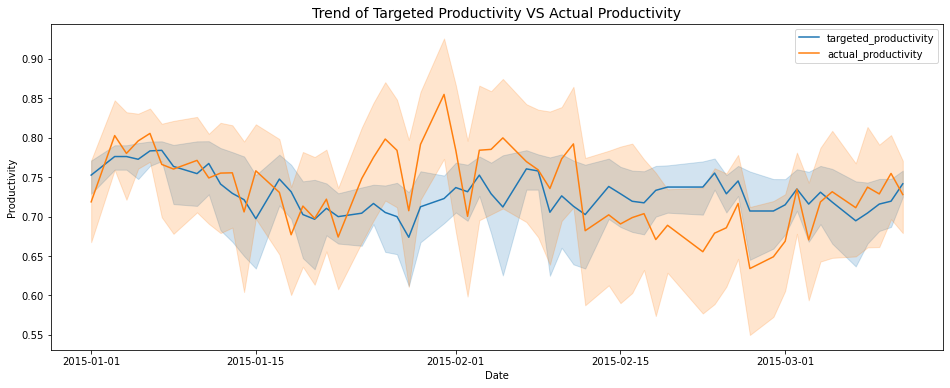

In [14]:
plt.figure(figsize = (16,6))
ax=sns.lineplot(y='targeted_productivity',x='date' ,data=df, legend='brief', label='targeted_productivity')
ax=sns.lineplot(y= 'actual_productivity',x='date',data=df, legend='brief', label='actual_productivity')
ax.set(ylabel = 'Productivity')
ax.set(xlabel = 'Date')
plt.title("Trend of Targeted Productivity VS Actual Productivity",fontsize=14)
plt.show()

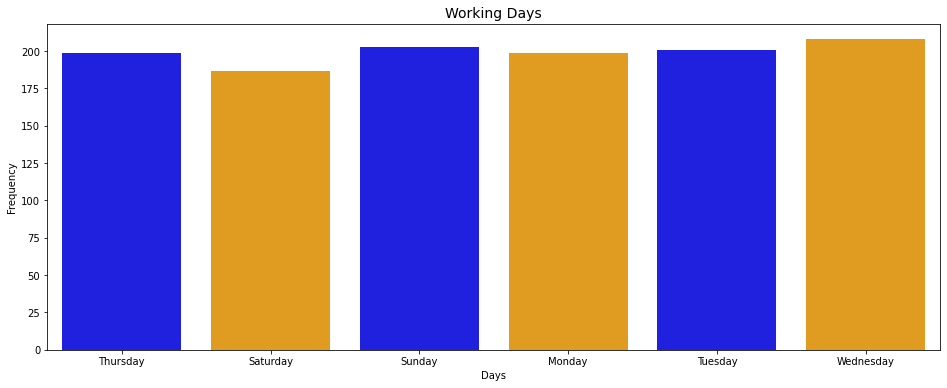

In [23]:
plt.figure(figsize = (16,6))
ax = sns.countplot(x = 'day', data = df, palette=["blue", "orange"])
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title("Working Days",fontsize=14)
plt.show()

__Conclussion__: The highest productivity is in the end of January and the lowest productivity is in the end of February. Friday is not working day

### 2. What month the factory spend the largest incentive? what department get the most incentive?

Text(0.5, 1.0, 'Total Incentive Per Month')

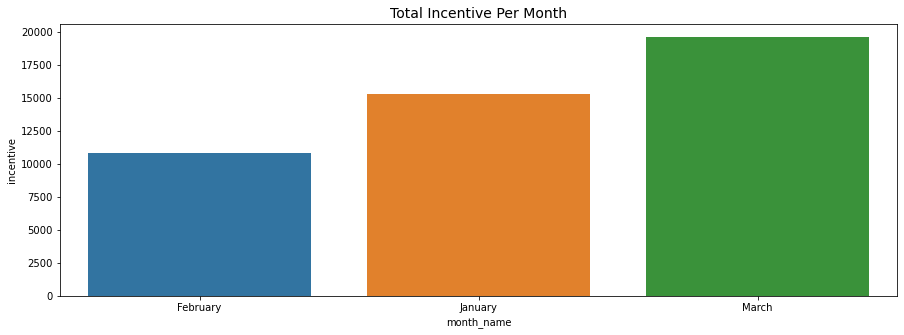

In [37]:
total_incentive_month = df.groupby(['month_name'], as_index=False)['incentive'].sum()\
                        .sort_values('incentive', ascending=True)

plt.figure(figsize=(15,5))
sns.barplot(data=total_incentive_month, x='month_name', y='incentive')
plt.title("Total Incentive Per Month",fontsize=14)

Text(0.5, 1.0, 'Total Incentive Per Month by Department')

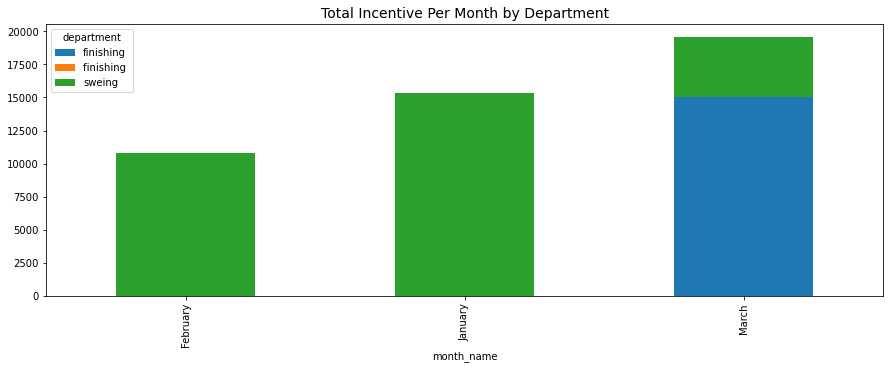

In [35]:
total_incentive = df.groupby(['month_name', 'department'])['incentive'].sum().unstack()

total_incentive.plot.bar(figsize=(15,5), stacked=True)
plt.title("Total Incentive Per Month by Department",fontsize=14)

__Conclussion__: The highest spend incentive is in March and sewing department is the department that received the most incentives

### 3. What department have the most overtime?

Text(0.5, 1.0, 'Total Overtime Per Month by Department')

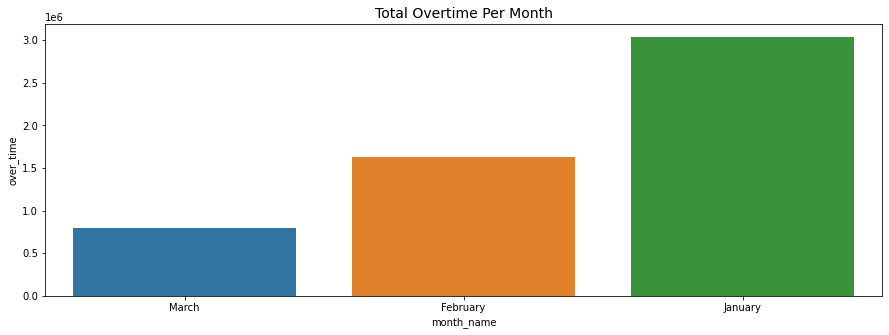

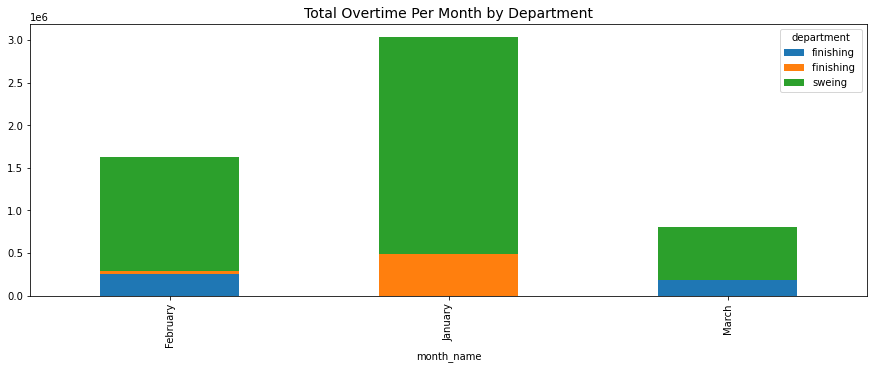

In [41]:
total_overtime_month = df.groupby(['month_name'], as_index=False)['over_time'].sum()\
                        .sort_values('over_time', ascending=True)

plt.figure(figsize=(15,5))
sns.barplot(data=total_overtime_month, x='month_name', y='over_time')
plt.title("Total Overtime Per Month",fontsize=14)

total_overtime = df.groupby(['month_name', 'department'])['over_time'].sum().unstack()

total_overtime.plot.bar(figsize=(15,5), stacked=True)
plt.title("Total Overtime Per Month by Department",fontsize=14)

__Conclussion__: The most overtime department is sewing department

### 4. How many total idle time and idle men for each month?

Text(0.5, 1.0, 'Total Idle Men Per Month')

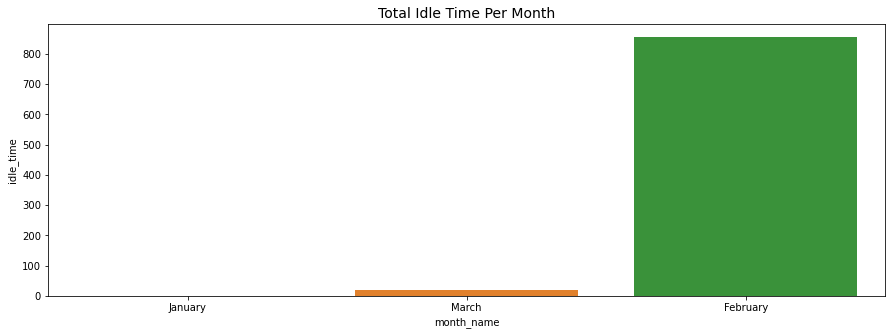

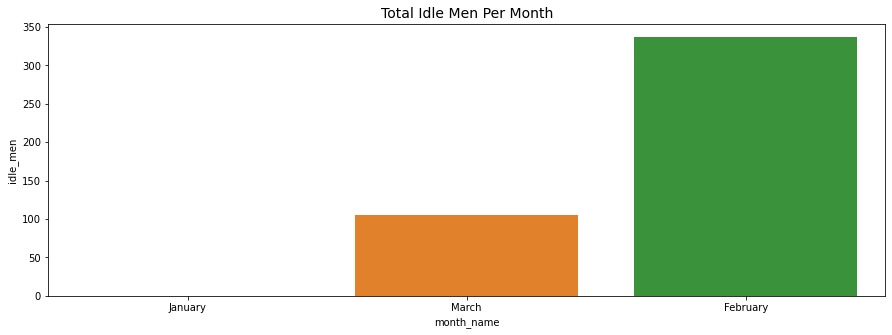

In [64]:
total_idle_time_month = df.groupby(['month_name'], as_index=False)['idle_time'].sum()\
                        .sort_values('idle_time', ascending=True)

plt.figure(figsize=(15,5))
sns.barplot(data=total_idle_time_month, x='month_name', y='idle_time')
plt.title("Total Idle Time Per Month",fontsize=14)

total_idle_men_month = df.groupby(['month_name'], as_index=False)['idle_men'].sum()\
                        .sort_values('idle_men', ascending=True)

plt.figure(figsize=(15,5))
sns.barplot(data=total_idle_men_month, x='month_name', y='idle_men')
plt.title("Total Idle Men Per Month",fontsize=14)

__Conclussion__: February has the highest idle time and idle men compared to the other month

# Machine Learning

In [46]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [61]:
# Define parameters and label
x = df[['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']]
y = df['actual_productivity']

# Split training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initiate the model
model = LinearRegression()

# Training process
model.fit(x_train, y_train)

# Testing and evaluation process
y_prediction = model.predict(x_test)
y_prediction

array([0.62365908, 0.81421924, 0.77813238, 0.75614693, 0.78975789,
       0.81501054, 0.60822348, 0.60822348, 0.68494572, 0.7691498 ,
       0.73760094, 0.82695516, 0.8483647 , 0.59917121, 0.77049811,
       0.77884864, 0.89908729, 0.63054411, 0.57156764, 0.78773662,
       0.9068986 , 0.6991263 , 0.84372303, 0.84279148, 0.79927759,
       0.61257561, 0.45940448, 0.87156705, 0.65116578, 0.82009565,
       0.78396707, 0.74531488, 0.86036737, 0.7025604 , 0.76043344,
       0.71263282, 0.75860459, 0.8487133 , 0.74543108, 0.76395664,
       0.76658616, 0.75839664, 0.7236244 , 0.78467875, 0.73477282,
       0.74523188, 0.69918226, 0.83727088, 0.79785265, 0.76149541,
       0.88438418, 0.80823932, 0.79892217, 0.73264232, 0.79892217,
       0.73422621, 0.71994893, 0.68089633, 0.82009565, 0.47580099,
       0.78729665, 0.75233113, 0.73241322, 0.7620869 , 0.61593695,
       0.72667509, 0.74511462, 0.79132146, 0.74438166, 0.705057  ,
       0.78232975, 0.71209037, 0.68231345, 0.75116324, 0.71372

In [62]:
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is 0.1584487577282374
mean_sqrd_error is== 0.01941172712145789
root_mean_squared error of is== 0.13932597432445212


__Conclussion__: This model need to be adjust and evaluate more because the model have low percentage of R2 Score (0.15 of 1), but the mean squared error is good (nearly 0)

In [79]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
